## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

I decide to choose these variables to explore the different relationships between demographics (age, sex, etc.) and socioeconimc factors like (income, stress, etc.). I think that these variables can offer insight into how job and personal life influence happiness and financial freedom. Especially nowadays, many people always talk about the work life balance and how it is perceived nowadays compared to how it used to be. My generation is often being “framed” as soft and sometimes even lazy, so lets explore that further if there is a truth to that or if my generation is actually working longer hours:
With the demographic varibales I’m trying to get an image of who the people are who are answering these questions. I might even put them into groups depending how similar some groups are, like similar age, marriage stauts, etc.
My goals is to find out how different life styles, work life balance, are leading up to stress. Some of the main questions I like to answer are:

•	What is the main reason for stress? Is it long working hours and only little free time? Could it be an unhealthy lifestyle?

•	How does income and financial organization in the household influence happiness? Are people with a good organized household happier, better off?

•	Does a previous marriage influence the happiness?

These are all questions I’d like to find out and answer. I hope to uncover certain patterns and find meaningful insights.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import re

df = pd.read_excel('/content/GSS.xlsx')
df.head()

,year,id_,hrs1,occ10,marital,sphrs2,age,happy,memsport,sphmewrk,fairhwrk,famfinan,stress,spjrel16,spevdiv,ballot
0,1972,1,.i: Inapplicable,"Wholesale and retail buyers, except farm products",Never married,.i: Inapplicable,23,Not too happy,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
1,1972,2,.i: Inapplicable,First-line supervisors of production and opera...,Married,.i: Inapplicable,70,Not too happy,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
2,1972,3,.i: Inapplicable,Real estate brokers and sales agents,Married,.i: Inapplicable,48,Pretty happy,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
3,1972,4,.i: Inapplicable,Accountants and auditors,Married,.i: Inapplicable,27,Not too happy,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
4,1972,5,.i: Inapplicable,Telephone operators,Married,.i: Inapplicable,61,Pretty happy,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable


In [5]:
print(df.info)
print(df.columns)

<bound method DataFrame.info of        year   id_               hrs1  \
0      1972     1  .i:  Inapplicable   
1      1972     2  .i:  Inapplicable   
2      1972     3  .i:  Inapplicable   
3      1972     4  .i:  Inapplicable   
4      1972     5  .i:  Inapplicable   
...     ...   ...                ...   
72385  2022  3541                 48   
72386  2022  3542                 50   
72387  2022  3543                 38   
72388  2022  3544                 40   
72389  2022  3545                 40   

                                                   occ10        marital  \
0      Wholesale and retail buyers, except farm products  Never married   
1      First-line supervisors of production and opera...        Married   
2                   Real estate brokers and sales agents        Married   
3                               Accountants and auditors        Married   
4                                    Telephone operators        Married   
...                                  

In [6]:
missing_codes = [
    ".i:  Inapplicable", ".n:  No answer",
    ".d:  Do not Know/Cannot Choose", ".x:  Not available in this release)",
    "-99", "-100"
]
df.replace(missing_codes, np.nan, inplace=True)
df.isnull().sum()

,0
year,0
id_,0
hrs1,30817
occ10,4262
marital,39
sphrs2,71700
age,769
happy,4777
memsport,48209
sphmewrk,68083


Lets drop some columns we don't "necesarally" need which have a lot of missing values

In [7]:
columns_to_drop = ['sphmewrk','fairhwrk', 'spjrel16', 'spevdiv','famfinan']
df.drop(columns=columns_to_drop)

,year,id_,hrs1,occ10,marital,sphrs2,age,happy,memsport,stress,ballot
0,1972,1,NaN,"Wholesale and retail buyers, except farm products",Never married,NaN,23,Not too happy,NaN,.y: Not available in this year,NaN
1,1972,2,NaN,First-line supervisors of production and opera...,Married,NaN,70,Not too happy,NaN,NaN,NaN
2,1972,3,NaN,Real estate brokers and sales agents,Married,NaN,48,Pretty happy,NaN,.y: Not available in this year,NaN
3,1972,4,NaN,Accountants and auditors,Married,NaN,27,Not too happy,NaN,.y: Not available in this year,NaN
4,1972,5,NaN,Telephone operators,Married,NaN,61,Pretty happy,NaN,.y: Not available in this year,NaN
...,...,...,...,...,...,...,...,...,...,...,...
72385,2022,3541,48,"Hotel, motel, and resort desk clerks",Never married,NaN,22,Pretty happy,.y: Not available in this year,Sometimes,Ballot a
72386,2022,3542,50,Elementary and middle school teachers,Married,NaN,29,Pretty happy,.y: Not available in this year,Often,Ballot a
72387,2022,3543,38,Respiratory therapists,Never married,NaN,32,Pretty happy,.y: Not available in this year,Often,Ballot b
72388,2022,3544,40,Elementary and middle school teachers,Married,NaN,49,Very happy,.y: Not available in this year,Often,Ballot c


Now lets change the occ10 variabe...

In [16]:
industry_keywords = {
    'Healthcare': ['nurse', 'physician', 'surgeon', 'therapist', 'medical', 'health', 'doctor'],
    'Education': ['teacher', 'educat', 'professor', 'instructor', 'school', 'administrator'],
    'Hospitality & Service': ['hotel', 'food', 'waiter', 'waitress', 'restaurant', 'service', 'housekeeping', 'clerk'],
    'Business & Management': ['manager', 'accountant', 'finance', 'analyst', 'auditor', 'operations', 'administrator'],
    'Sales & Retail': ['sales', 'retail', 'buyer', 'broker', 'real estate'],
    'Construction & Manual Labor': ['construction', 'laborer', 'operator', 'supervisor', 'production', 'manufacturing'],
    'Other': []
}

def map_industry(occupation):
    if pd.isnull(occupation):
        return 'Other'

    occupation = occupation.lower()

    for industry, keywords in industry_keywords.items():
        if any(re.search(keyword, occupation) for keyword in keywords):
            return industry

    return 'Other'

df['industry'] = df['occ10'].apply(map_industry)

df['industry'].head(10)


,industry
0,Sales & Retail
1,Construction & Manual Labor
2,Sales & Retail
3,Business & Management
4,Construction & Manual Labor
5,Sales & Retail
6,Other
7,Hospitality & Service
8,Other
9,Hospitality & Service


In [17]:
df.drop('occ10', axis=1, inplace=True)

lets change some variables like age into floats

In [24]:
df['hrs1'] = pd.to_numeric(df['hrs1'], errors='coerce')

In [19]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [21]:
df['happy'].unique()

array(['Not too happy', 'Pretty happy', 'Very happy', '.n:  No answer',
       '.d:  Do not Know/Cannot Choose', '.i:  Inapplicable',
       '.s:  Skipped on Web'], dtype=object)

In [23]:
happiness_mapping = {
    'Not too happy': 1,
    'Pretty happy': 2,
    'Very happy': 3,
    '.n:  No answer': None,
    '.d:  Do not Know/Cannot Choose': None,
    '.i:  Inapplicable': None,
    '.s:  Skipped on Web': None
}
df['happy_numeric'] = df['happy'].map(happiness_mapping)

In [25]:
marital_mapping = {
    'Never married': 'Single',
    'Married': 'Married',
    'Divorced': 'Divorced',
    'Widowed': 'Widowed',
    'Separated': 'Separated',
    '.n:  No answer': None
}
df['marital'] = df['marital'].map(marital_mapping)

In [26]:
df['memsport'].unique()

array(['.i:  Inapplicable', 'YES', 'NO', '.n:  No answer',
       '.d:  Do not Know/Cannot Choose',
       '.y:  Not available in this year'], dtype=object)

In [27]:
yes_no_mapping = {
    'YES': 1,
    'NO': 0,
    '.i:  Inapplicable': None,
    '.n:  No answer': None,
    '.d:  Do not Know/Cannot Choose': None,
    '.y:  Not available in this year': None
}
df['mesport'] = df['memsport'].map(yes_no_mapping)

In [28]:
df['stress'].unique()

array(['.y:  Not available in this year', '.i:  Inapplicable',
       '.n:  No answer', 'Sometimes', 'Often', 'Hardly ever',
       '.d:  Do not Know/Cannot Choose', 'Never', 'Always',
       '.s:  Skipped on Web'], dtype=object)

In [29]:
stress_mapping = {
    'Never': 1,
    'Hardly ever': 2,
    'Sometimes': 3,
    'Often': 4,
    'Always': 5,
    '.y:  Not available in this year': None,
    '.i:  Inapplicable': None,
    '.n:  No answer': None,
    '.d:  Do not Know/Cannot Choose': None,
    '.s:  Skipped on Web': None

}
df['stress'] = df['stress'].map(stress_mapping)

In [31]:
df.head()

,year,id_,hrs1,marital,sphrs2,age,happy,memsport,sphmewrk,fairhwrk,famfinan,stress,spjrel16,spevdiv,ballot,industry,happy_numeric,mesport
0,1972,1,NaN,Single,.i: Inapplicable,23.0,Not too happy,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Sales & Retail,1.0,NaN
1,1972,2,NaN,Married,.i: Inapplicable,70.0,Not too happy,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Construction & Manual Labor,1.0,NaN
2,1972,3,NaN,Married,.i: Inapplicable,48.0,Pretty happy,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Sales & Retail,2.0,NaN
3,1972,4,NaN,Married,.i: Inapplicable,27.0,Not too happy,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Business & Management,1.0,NaN
4,1972,5,NaN,Married,.i: Inapplicable,61.0,Pretty happy,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Construction & Manual Labor,2.0,NaN


In [34]:
special_codes = ['.i:  Inapplicable', '.n:  No answer', '.d:  Do not Know/Cannot Choose', '.s:  Skipped on Web', '.y:  Not available in this year']
columns_to_clean = ['memsport', 'sphmewrk', 'fairhwrk', 'famfinan', 'stress','sphrs2','spjrel16','spevdiv','ballot']

df[columns_to_clean] = df[columns_to_clean].replace(special_codes, np.nan)

df.head()

,year,id_,hrs1,marital,sphrs2,age,happy,memsport,sphmewrk,fairhwrk,famfinan,stress,spjrel16,spevdiv,ballot,industry,happy_numeric,mesport
0,1972,1,NaN,Single,NaN,23.0,Not too happy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sales & Retail,1.0,NaN
1,1972,2,NaN,Married,NaN,70.0,Not too happy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Construction & Manual Labor,1.0,NaN
2,1972,3,NaN,Married,NaN,48.0,Pretty happy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sales & Retail,2.0,NaN
3,1972,4,NaN,Married,NaN,27.0,Not too happy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Business & Management,1.0,NaN
4,1972,5,NaN,Married,NaN,61.0,Pretty happy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Construction & Manual Labor,2.0,NaN


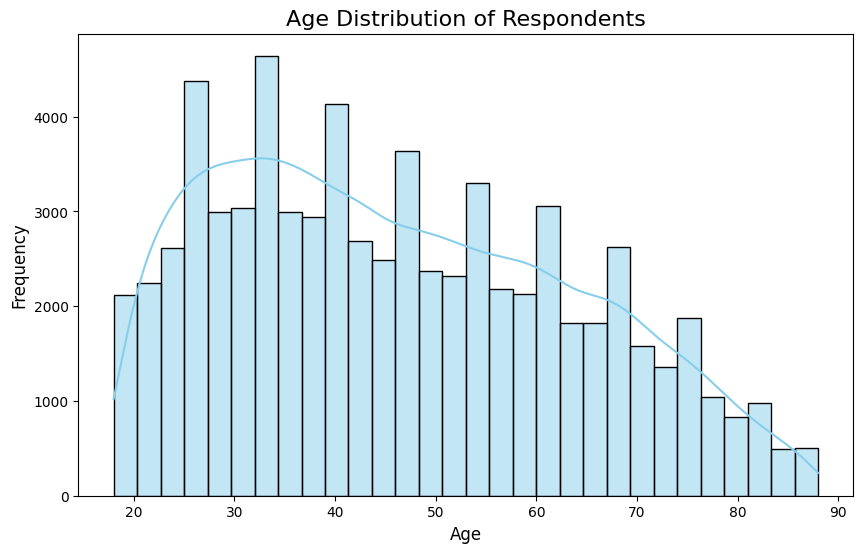

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Respondents', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<ipython-input-38-12b487592e82>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='happy_numeric', y='hrs1', palette='coolwarm')


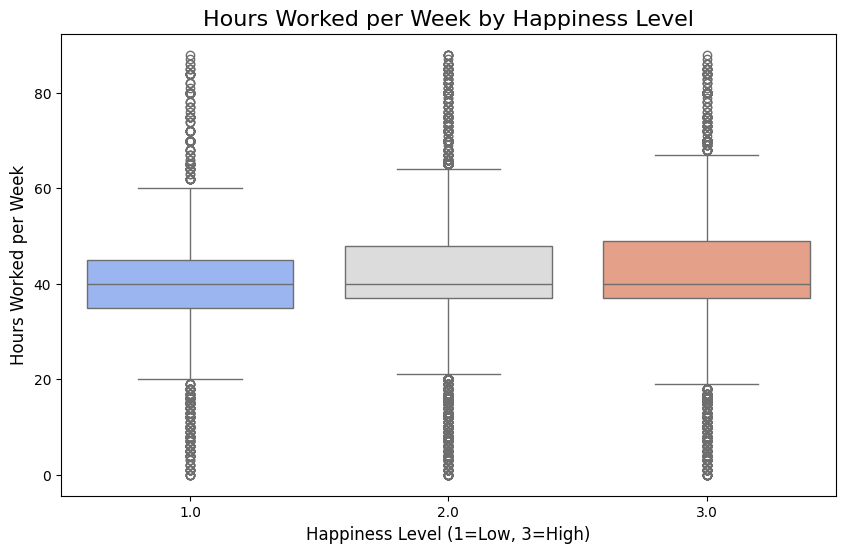

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='happy_numeric', y='hrs1', palette='coolwarm')
plt.title('Hours Worked per Week by Happiness Level', fontsize=16)
plt.xlabel('Happiness Level (1=Low, 3=High)', fontsize=12)
plt.ylabel('Hours Worked per Week', fontsize=12)
plt.show()

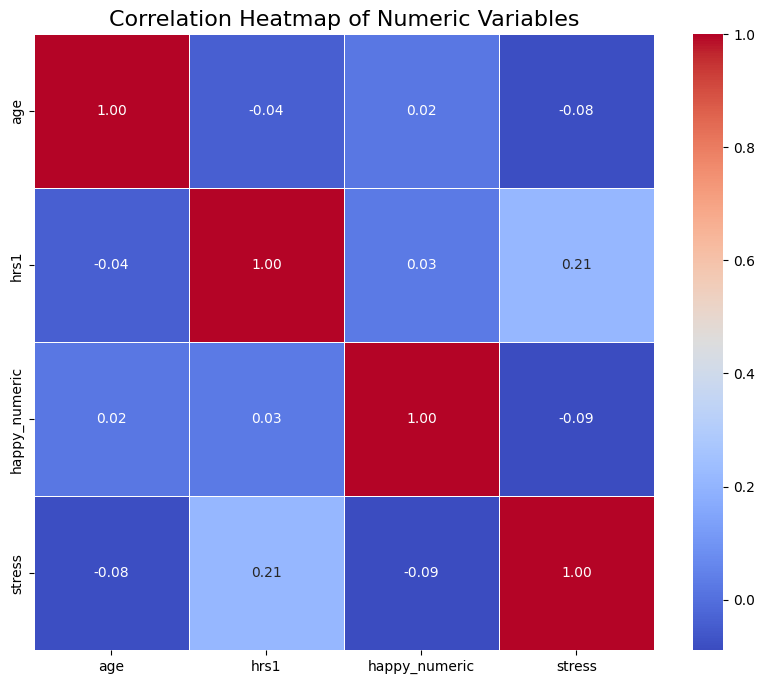

In [42]:
corr = df[['age', 'hrs1', 'happy_numeric', 'stress']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables', fontsize=16)
plt.show()

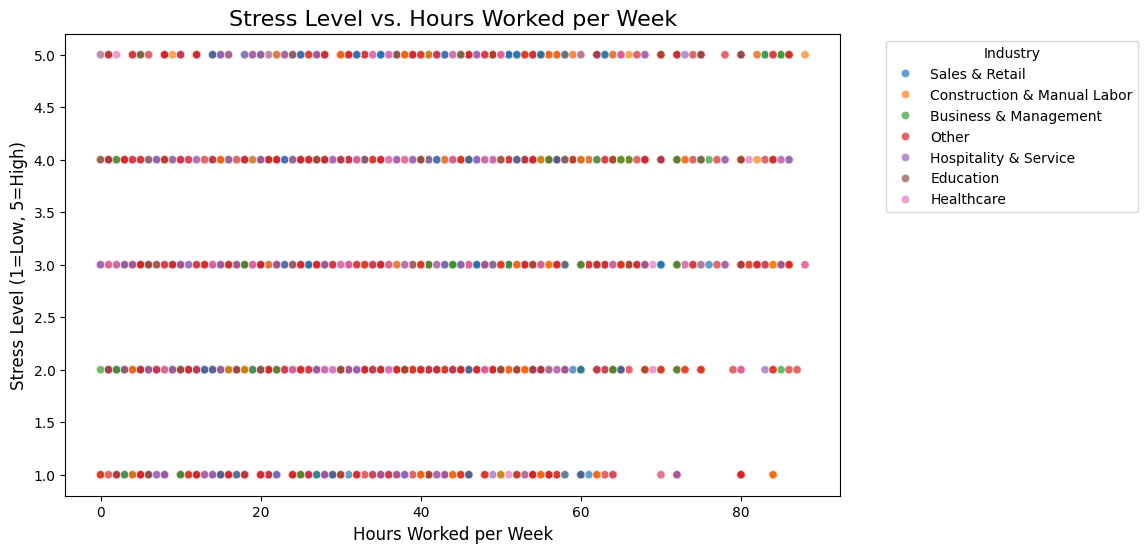

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='hrs1', y='stress', hue='industry', alpha=0.7, palette='tab10')
plt.title('Stress Level vs. Hours Worked per Week', fontsize=16)
plt.xlabel('Hours Worked per Week', fontsize=12)
plt.ylabel('Stress Level (1=Low, 5=High)', fontsize=12)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-47-ee874cb89dee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='memsport', y='stress', palette='Set2')


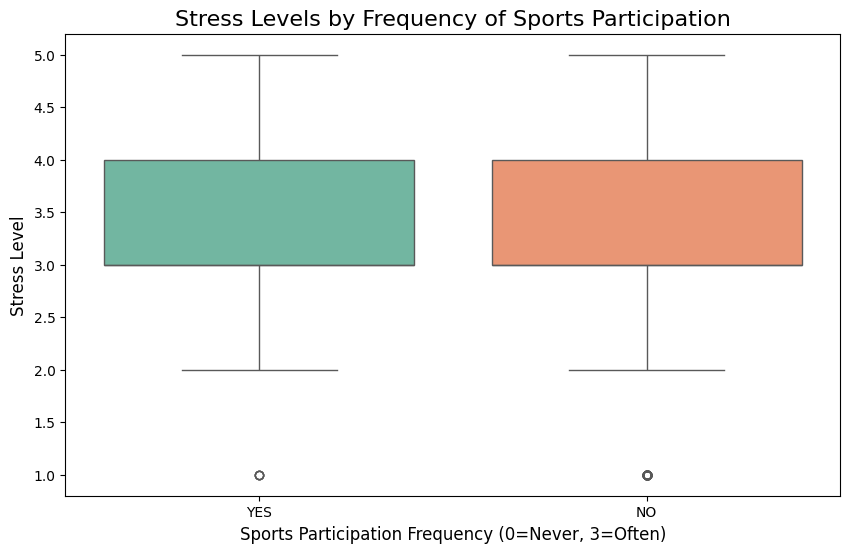

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='memsport', y='stress', palette='Set2')
plt.title('Stress Levels by Frequency of Sports Participation', fontsize=16)
plt.xlabel('Sports Participation Frequency (0=Never, 3=Often)', fontsize=12)
plt.ylabel('Stress Level', fontsize=12)
plt.show()

<ipython-input-51-0fe044b49e04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='famfinan', y='happy_numeric', palette='coolwarm')


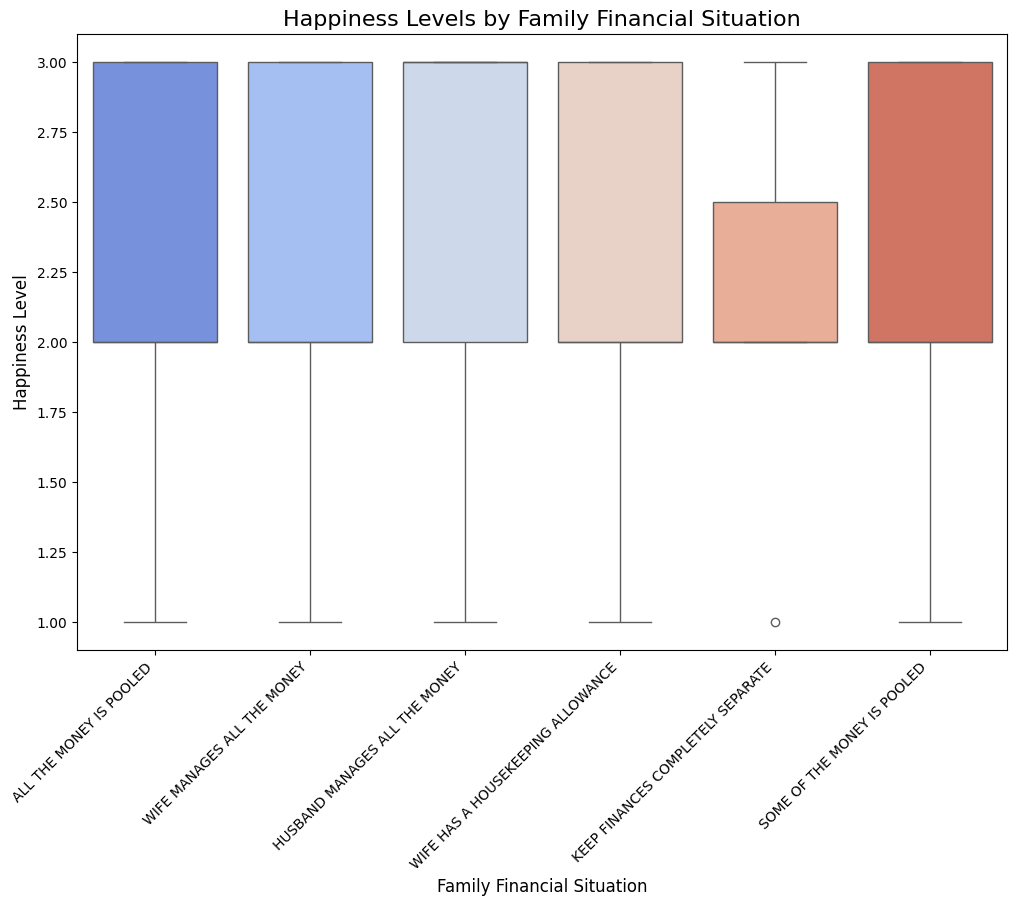

In [51]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='famfinan', y='happy_numeric', palette='coolwarm')
plt.title('Happiness Levels by Family Financial Situation', fontsize=16)
plt.xlabel('Family Financial Situation', fontsize=12)
plt.ylabel('Happiness Level', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-53-c71484f45c91>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='marital', y='stress', ax=axes[0], palette='pastel')
<ipython-input-53-c71484f45c91>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='marital', y='happy_numeric', ax=axes[1], palette='muted')


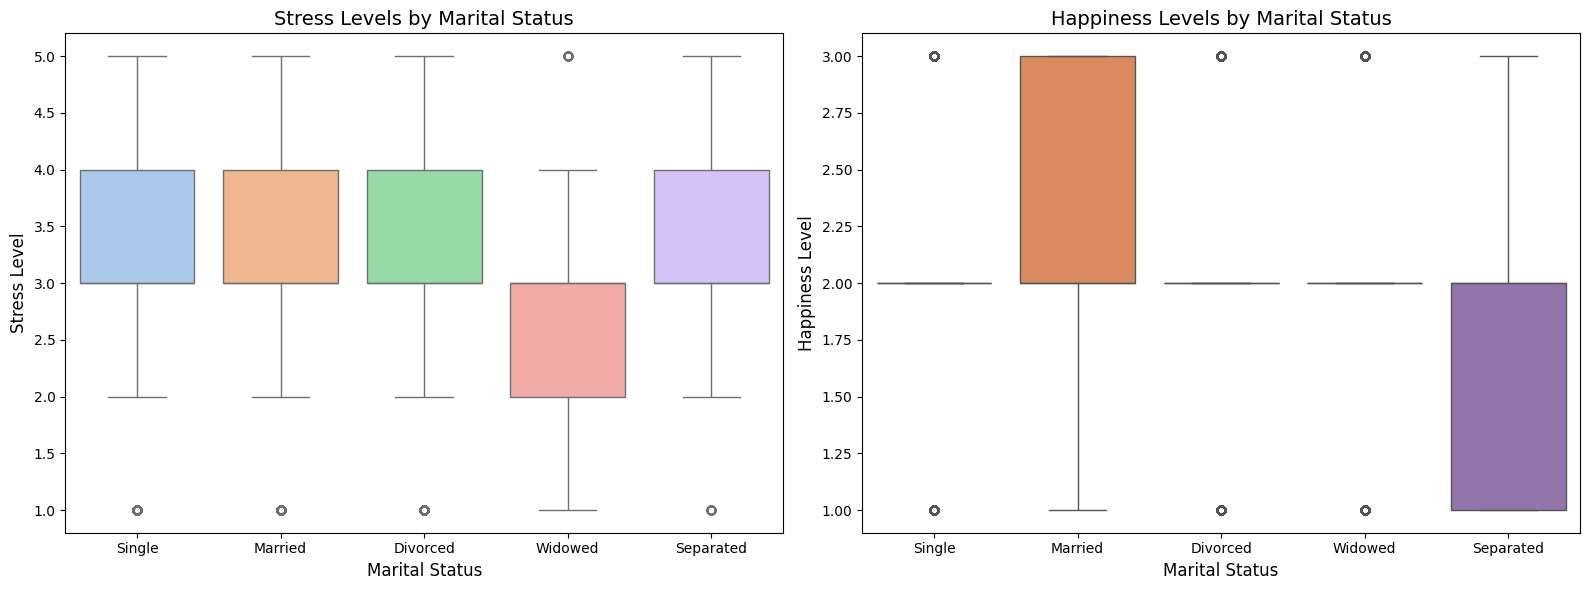

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=df, x='marital', y='stress', ax=axes[0], palette='pastel')
axes[0].set_title('Stress Levels by Marital Status', fontsize=14)
axes[0].set_xlabel('Marital Status', fontsize=12)
axes[0].set_ylabel('Stress Level', fontsize=12)
sns.boxplot(data=df, x='marital', y='happy_numeric', ax=axes[1], palette='muted')
axes[1].set_title('Happiness Levels by Marital Status', fontsize=14)
axes[1].set_xlabel('Marital Status', fontsize=12)
axes[1].set_ylabel('Happiness Level', fontsize=12)
plt.tight_layout()
plt.show()

In [55]:
numeric_summary = df[['age', 'hrs1', 'happy_numeric', 'stress', 'famfinan']].describe()

print(numeric_summary)

                age          hrs1  happy_numeric        stress
count  71212.000000  41266.000000   67588.000000  15879.000000
mean      46.312209     40.843285       2.162677      3.149569
std       17.353604     13.584545       0.643490      1.016608
min       18.000000      0.000000       1.000000      1.000000
25%       32.000000     37.000000       2.000000      3.000000
50%       44.000000     40.000000       2.000000      3.000000
75%       60.000000     48.000000       3.000000      4.000000
max       88.000000     88.000000       3.000000      5.000000
